<a href="https://colab.research.google.com/github/Mathans19/CodeAlpha_DataScience/blob/main/TASK_3_Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64
Mean Squared Error: 0.47310162544208184
R-squared Score: 0.6162271478185639
Coefficients: [ 0.83370183  0.15187798 -0.22338256  0.18757833  0.02714367 -0.21477664
 -0.8387286  -0.79178108]
Intercept: 2.0302019

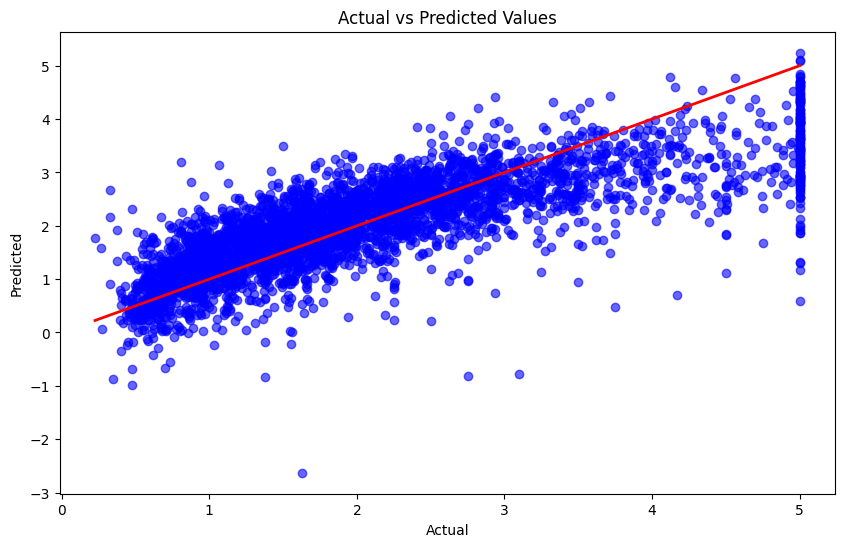

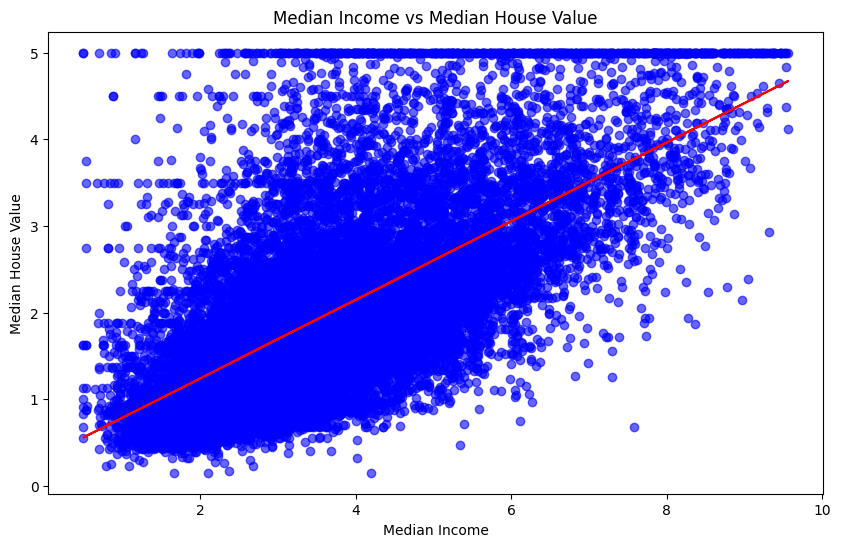

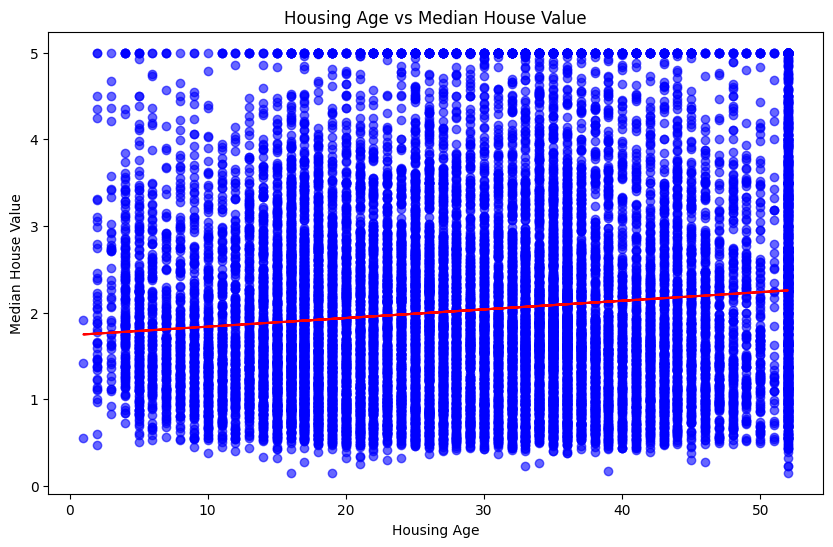

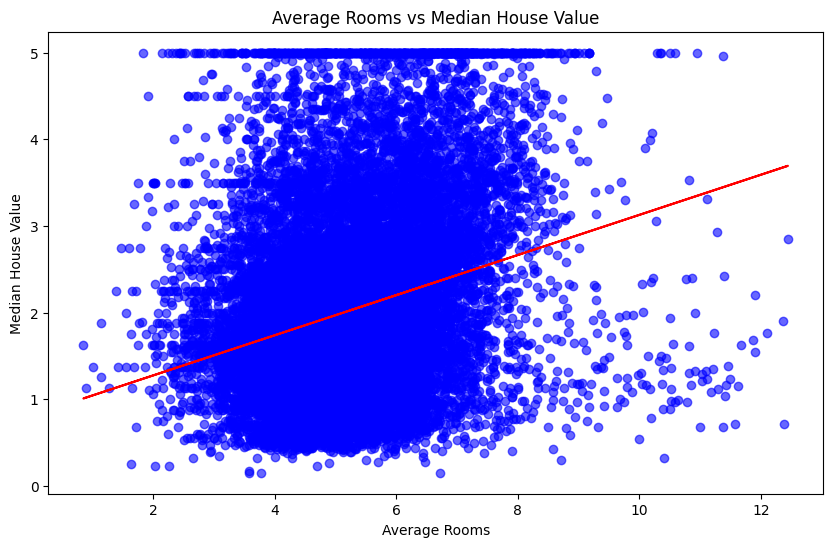

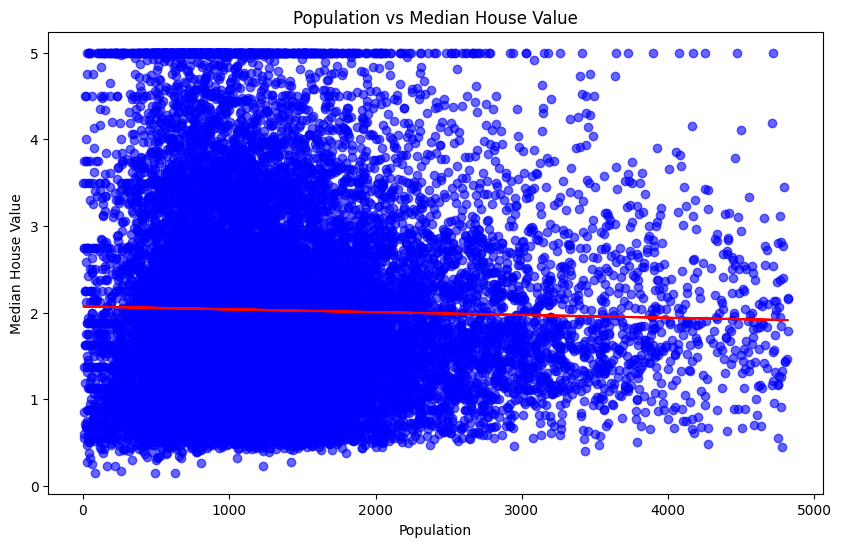

In [6]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Load the California Housing dataset
housing = fetch_california_housing()
data = pd.DataFrame(housing.data, columns=housing.feature_names)
data['MedHouseVal'] = housing.target

# Display the first few rows of the dataset
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Handling outliers: Using z-score to remove outliers
z_scores = np.abs(zscore(data))
data = data[(z_scores < 3).all(axis=1)]

# Splitting the dataset into features and target variable
X = data.drop('MedHouseVal', axis=1)
y = data['MedHouseVal']

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initializing the linear regression model
model = LinearRegression()

# Fitting the model on the training data
model.fit(X_train, y_train)

# Making predictions on the test data
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

# Optionally, you can print the coefficients of the features
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Plotting the actual vs predicted values
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

# Plotting relationships between individual features and target
features_to_plot = ['MedInc', 'HouseAge', 'AveRooms', 'Population']
feature_names = ['Median Income', 'Housing Age', 'Average Rooms', 'Population']

for feature, name in zip(features_to_plot, feature_names):
    plt.figure(figsize=(10, 6))
    plt.scatter(data[feature], data['MedHouseVal'], alpha=0.6, color='blue')
    plt.xlabel(name)
    plt.ylabel('Median House Value')
    plt.title(f'{name} vs Median House Value')
    # Fit a linear regression line
    slope, intercept = np.polyfit(data[feature], data['MedHouseVal'], 1)
    plt.plot(data[feature], slope*data[feature] + intercept, color='red')
    plt.show()
